In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# from data_load import Data
# load = Data()
# load.HOMES_FOR_SALE()
# load.INCOME()
# load.HOMICIDES()
# load.POPULATION()
# load.ZIP_COUNTY()

In [3]:
from Final_Data_Output import Final_Data as FD
FD = FD()
Master_df = FD.Merge_all(min_price=1000, max_bed=12, max_bath=10)
Master_df['log_price'] = np.log(Master_df['price'])
Master_df.info()

c:\Users\elang\Documents\CDA\House_Prices_Project\Final_Data_Output.py:95: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Homicides'] = df['Homicides'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083406 entries, 0 to 1083405
Data columns (total 55 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   Unnamed: 0_x           1083406 non-null  int64   
 1   brokered_by            1083406 non-null  float64 
 2   status                 1083406 non-null  object  
 3   price                  1083406 non-null  float64 
 4   bed                    1083406 non-null  float64 
 5   bath                   1083406 non-null  float64 
 6   acre_lot               1083406 non-null  float64 
 7   street                 1083406 non-null  float64 
 8   city_x                 1083406 non-null  object  
 9   state_x                1083406 non-null  object  
 10  zip_code               1083406 non-null  float64 
 11  house_size             1083406 non-null  float64 
 12  prev_sold_date         1083406 non-null  object  
 13  Households             1075166 non-null  float64 
 14  To

In [4]:
df = Master_df[['bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'Household_AGI', 'Total_Pop', 'Homicides', 'Rate', 'log_price']]
df = df.dropna()
df = sm.add_constant(df)
df.shape

(1065650, 11)

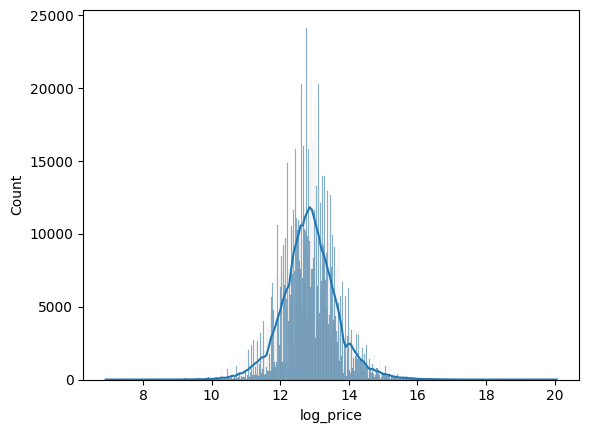

0.0


In [ ]:
sns.histplot(df['log_price'], kde=True)
plt.show()

In [6]:
df.corr()

,const,bed,bath,house_size,acre_lot,zip_code,Household_AGI,Total_Pop,Homicides,Rate,log_price
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bed,NaN,1.000000,0.607196,0.250421,-0.000220,-0.050385,0.101020,0.075302,-0.013545,0.004712,0.374766
bath,NaN,0.607196,1.000000,0.310681,-0.001613,-0.017191,0.299065,0.071401,0.031863,0.011223,0.582423
house_size,NaN,0.250421,0.310681,1.000000,-0.000026,-0.009743,0.112063,0.003013,-0.005997,0.000901,0.211716
acre_lot,NaN,-0.000220,-0.001613,-0.000026,1.000000,-0.006029,-0.002009,-0.002103,-0.001405,-0.000258,-0.002831
zip_code,NaN,-0.050385,-0.017191,-0.009743,-0.006029,1.000000,0.053201,0.201744,0.273696,-0.005060,0.236637
Household_AGI,NaN,0.101020,0.299065,0.112063,-0.002009,0.053201,1.000000,-0.063442,0.095915,0.004840,0.487991
Total_Pop,NaN,0.075302,0.071401,0.003013,-0.002103,0.201744,-0.063442,1.000000,0.232278,0.062852,0.146369
Homicides,NaN,-0.013545,0.031863,-0.005997,-0.001405,0.273696,0.095915,0.232278,1.000000,0.073059,0.155379
Rate,NaN,0.004712,0.011223,0.000901,-0.000258,-0.005060,0.004840,0.062852,0.073059,1.000000,0.012530


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['const','bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'Household_AGI', 
                                                        'Total_Pop', 'Homicides', 'Rate']], df[['log_price']], test_size=0.33, random_state=42)
X_train_fe = X_train[['const','bed', 'bath', 'house_size', 'acre_lot',
                                      'Household_AGI', 'Total_Pop', 'Homicides', 'Rate']]
exog_re = X_train[['const','bed', 'bath', 'house_size', 'acre_lot',
                                   'Household_AGI', 'Total_Pop', 'Homicides', 'Rate']]
exog_re = np.ones((len(X_train), 1))

In [9]:
mod = sm.MixedLM(y_train, X_train_fe, X_train['zip_code'], exog_re=exog_re)
result = mod.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_price   
No. Observations: 713985  Method:             REML        
No. Groups:       21729   Scale:              0.1255      
Min. group size:  1       Log-Likelihood:     -306702.0088
Max. group size:  680     Converged:          Yes         
Mean group size:  32.9                                    
----------------------------------------------------------
              Coef.  Std.Err.    z     P>|z| [0.025 0.975]
----------------------------------------------------------
const         11.202    0.006 1725.021 0.000 11.189 11.215
bed            0.091    0.001  162.479 0.000  0.090  0.092
bath           0.254    0.001  451.038 0.000  0.253  0.255
house_size     0.000    0.000   48.740 0.000  0.000  0.000
acre_lot       0.000    0.000    1.400 0.162 -0.000  0.000
Household_AGI  0.004    0.000   80.714 0.000  0.004  0.004
Total_Pop      0.000    0.000   36.115 0.000  0.000  0.000
Homicide

In [10]:
re = pd.DataFrame(result.random_effects).T.reset_index()
re.columns = ['zip_code', 'random_effect']
temp_df = X_test[['zip_code']].merge(re, on='zip_code', how='left')

In [12]:
exog = X_test[['const', 'bed', 'bath', 'house_size', 'acre_lot',
               'Household_AGI', 'Total_Pop', 'Homicides', 'Rate']]
groups = X_test['zip_code']
y_pred_mixed = result.predict(exog=exog)+ temp_df['random_effect'].values
deviance_explained = 1 - np.sum((y_test['log_price'] - y_pred_mixed) ** 2) / np.sum((y_test['log_price'] - np.mean(y_test['log_price'])) ** 2)
print(f'Deviance Explained: {deviance_explained:.4f}')

Deviance Explained: 0.7943
